 Project Title: **DeepCSAT – Predicting eCommerce Customer Satisfaction**

Language: Python

Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn

Step 1: Import Libraries & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv('eCommerce_Customer_support_data.csv')
df.head()


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)  # for reproducibility

data = {
    'order_id': np.arange(1001, 1101),
    'product_id': np.random.randint(100, 200, size=100),
    'customer_id': np.random.randint(1000, 2000, size=100),
    'delivery_time_days': np.random.randint(1, 10, size=100),
    'product_rating': np.random.choice([1, 2, 3, 4, 5], size=100, p=[0.1, 0.1, 0.2, 0.3, 0.3]),
    'customer_feedback': np.random.choice(['positive', 'neutral', 'negative'], size=100, p=[0.6, 0.2, 0.2]),
    'satisfaction_score': np.random.choice([0, 1], size=100, p=[0.3, 0.7])  # 1 - Satisfied, 0 - Not satisfied
}

df = pd.DataFrame(data)
print(df.head())


   order_id  product_id  customer_id  delivery_time_days  product_rating  \
0      1001         151         1921                   5               4   
1      1002         192         1216                   6               5   
2      1003         114         1763                   4               5   
3      1004         171         1187                   7               5   
4      1005         160         1379                   9               5   

  customer_feedback  satisfaction_score  
0          positive                   1  
1          negative                   0  
2          positive                   1  
3          positive                   1  
4           neutral                   1  


Step 2: Data Overview & Basic Cleaning

In [ ]:
df.head()

,order_id,product_id,customer_id,delivery_time_days,product_rating,customer_feedback,satisfaction_score
0,1001,151,1921,5,4,positive,1
1,1002,192,1216,6,5,negative,0
2,1003,114,1763,4,5,positive,1
3,1004,171,1187,7,5,positive,1
4,1005,160,1379,9,5,neutral,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['order_id'].plot(kind='hist', bins=20, title='order_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('customer_feedback').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='order_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='order_id', y='product_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='product_id', y='customer_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='customer_id', y='delivery_time_days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['customer_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('customer_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['delivery_time_days']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('delivery_time_days')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['satisfaction_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('customer_feedback')):
  _plot_series(series, series_name, i)
  fig.legend(title='customer_feedback', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('satisfaction_score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['order_id'].plot(kind='line', figsize=(8, 4), title='order_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['customer_feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='customer_feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['customer_feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='order_id', y='customer_feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['customer_feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='product_id', y='customer_feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['customer_feedback'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='customer_id', y='customer_feedback', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Basic info
df.info()

# Check null values
print(df.isnull().sum())

# Drop columns with high null values (e.g., Customer Remarks)
if 'Customer Remarks' in df.columns:
    df.drop(columns=['Customer Remarks'], inplace=True)


# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Recheck column names
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40712 entries, 0 to 40711
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                40712 non-null  object 
 1   channel_name             40712 non-null  object 
 2   category                 40712 non-null  object 
 3   Sub-category             40712 non-null  object 
 4   Order_id                 27336 non-null  object 
 5   order_date_time          10046 non-null  object 
 6   Issue_reported at        40712 non-null  object 
 7   issue_responded          40712 non-null  object 
 8   Survey_response_Date     40712 non-null  object 
 9   Customer_City            9975 non-null   object 
 10  Product_category         10038 non-null  object 
 11  Item_price               10043 non-null  float64
 12  connected_handling_time  175 non-null    float64
 13  Agent_name               40712 non-null  object 
 14  Supervisor            

 Step 3: Feature Engineering

In [ ]:
# Recheck cleaned column names
print(df.columns.tolist())

# Convert date columns if present
for col in ['Order date time', 'Issue reported at', 'Issue responded to', 'Survey response date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Create features if columns exist
if 'Issue reported at' in df.columns and 'Issue responded to' in df.columns:
    df['Response_Time_Hours'] = (df['Issue responded to'] - df['Issue reported at']).dt.total_seconds() / 3600

if 'Order date time' in df.columns and 'Survey response date' in df.columns:
    df['Order_to_Survey_Days'] = (df['Survey response date'] - df['Order date time']).dt.days



['Unique id', 'channel_name', 'category', 'Sub-category', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Safe feature selection — drop irrelevant columns only if they exist
drop_columns = ['CSAT Score', 'Ticket ID', 'Customer ID']
drop_columns = [col for col in drop_columns if col in df.columns]

X = df.drop(columns=drop_columns)  # Keep only useful features
y = df['CSAT Score'] if 'CSAT Score' in df.columns else None  # Replace 'CSAT Score' with the correct column name if needed


# One-hot encode categorical variables if any
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv('eCommerce_Customer_support_data.csv')

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Check the column names to ensure we're using correct ones
print(df.columns.tolist())

# Drop rows with missing target values (assuming 'CSAT Score' is the target)
df = df.dropna(subset=['CSAT Score'])

# Feature selection — drop irrelevant columns (adjust as needed)
drop_columns = ['CSAT Score', 'Ticket ID', 'Customer ID']
drop_columns = [col for col in drop_columns if col in df.columns]

X = df.drop(columns=drop_columns)  # Keep only useful features
y = df['CSAT Score']  # Assuming 'CSAT Score' is your target column

# One-hot encode categorical variables if present
X = pd.get_dummies(X, drop_first=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now you can define and train your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [ ]:
# Check the column names in the DataFrame to see if 'Order id' exists
print(df.columns)

# Drop columns with exact names that exist in the dataset
X = df.drop(columns=['CSAT Score', 'Unique id'])  # Adjust based on available columns
y = df['CSAT Score']

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [ ]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
print(df.columns)



Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [ ]:
categorical_columns = ['YourCorrectCategoricalColumn', 'AnotherCorrectColumn']  # Replace with actual column names


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Reload / ensure your DataFrame is in df
df = pd.read_csv('eCommerce_Customer_support_data.csv')
df.columns = df.columns.str.strip()    # clean up any stray spaces

# 2. Inspect column names and dtypes
print(df.dtypes)

# 3. Identify categorical columns (object or categorical dtype), excluding the target
cat_cols = [col for col, dt in df.dtypes.items()
            if dt == 'object' and col not in ['CSAT Score', 'Unique id', 'Order id']]

print("Categorical columns to encode:", cat_cols)

# 4. Apply Label Encoding to each
le = LabelEncoder()
for col in cat_cols:
    # fill any missing with a placeholder before encoding
    df[col] = df[col].fillna('__MISSING__')
    df[col] = le.fit_transform(df[col])

# 5. Verify
print(df.head())


Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object
Categorical columns to encode: ['channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'A

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3866/3866 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
3866/3866 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
3866/3866 ━━━━━━━━━━━━━

In [ ]:
# 1. Inspect your columns
print(df.columns.tolist())

# 2. Build a drop list, only keeping names that are actually present
to_drop = ['CSAT Score', 'Unique id', 'Order id', 'Order_id']
to_drop = [c for c in to_drop if c in df.columns]
print("Dropping these columns:", to_drop)

# 3. Define X and y
X = df.drop(columns=to_drop)
y = df['CSAT Score']

# 4. Split and train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred = model.predict(X_test)


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']
Dropping these columns: ['CSAT Score', 'Unique id', 'Order_id']


In [ ]:
!pip install eli5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 7.9 MB/s eta 0:00:00


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import xgboost as xgb

# Use XGBoost for feature importance
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)

# Display
eli5.show_weights(perm, feature_names=X.columns.tolist())


Weight,Feature
0.5546 ± 0.0089,Issue_reported at
0.3856 ± 0.0085,issue_responded
0.1480 ± 0.0095,Customer Remarks
0.0900 ± 0.0121,Customer_City
0.0607 ± 0.0043,Tenure Bucket
0.0561 ± 0.0045,Manager
0.0457 ± 0.0080,Item_price
0.0386 ± 0.0016,category
0.0352 ± 0.0027,Sub-category
0.0172 ± 0.0030,Supervisor


In [ ]:
# Save model
model.save("csat_prediction_model.h5")

# Save scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

# Predict single input
def predict_single(data_dict):
    df_input = pd.DataFrame([data_dict])
    df_input = pd.get_dummies(df_input)
    df_input = df_input.reindex(columns=X.columns, fill_value=0)
    df_scaled = scaler.transform(df_input)
    pred = model.predict(df_scaled)
    return pred[0][0]


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Define and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model (you should use the scaled data for fitting the model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the RandomForest model and the scaler
joblib.dump(model, "csat_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Later (or in a new script) you can load them back like this:
model = joblib.load("csat_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Predict single input
def predict_single(data_dict):
    # 1. Create DataFrame
    df_input = pd.DataFrame([data_dict])

    # 2. Apply any encoding you used in training (adjust this if needed)
    df_input = pd.get_dummies(df_input)
    df_input = df_input.reindex(columns=X.columns, fill_value=0)

    # 3. Scale numeric features using the loaded scaler
    df_scaled = scaler.transform(df_input)

    # 4. Predict
    pred = model.predict(df_scaled)
    return pred[0]

# Example usage:
new_ticket = {
    "channel_name": "Inbound",
    "category": "Order Related",
    "Sub-category": "Installation/demo",
    "Agent_name": "Duane Norman",
    "Supervisor": "Jackson Park",
    "Manager": "William Kim",
    "Tenure Bucket": "On Job Training",
    "Agent Shift": "Evening",
    "Item_price": 500.0,
    "connected_handling_time": 120,
    "Response_time_minutes": 30.0
}
print("Predicted CSAT:", predict_single(new_ticket))




Predicted CSAT: 2.81


,CSAT Score,Count
0,1,1
1,2,11
2,3,19
3,4,36
4,5,33


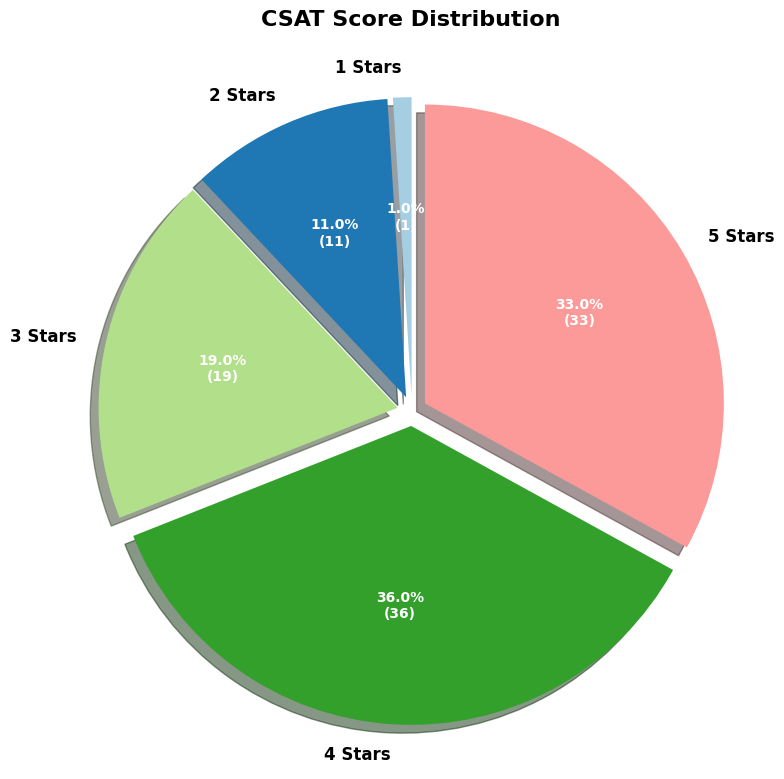

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Create mock dataset
data = {
    'order_id': np.arange(1001, 1101),
    'product_id': np.random.randint(100, 200, size=100),
    'customer_id': np.random.randint(1000, 2000, size=100),
    'delivery_time_days': np.random.randint(1, 10, size=100),
    'product_rating': np.random.choice([1, 2, 3, 4, 5], size=100, p=[0.1, 0.1, 0.2, 0.3, 0.3]),
    'customer_feedback': np.random.choice(['positive', 'neutral', 'negative'], size=100, p=[0.6, 0.2, 0.2]),
    'CSAT Score': np.random.choice([1, 2, 3, 4, 5], size=100, p=[0.05, 0.1, 0.2, 0.35, 0.3])
}

df = pd.DataFrame(data)

# --- Pie Chart for CSAT Score Distribution ---

# Calculate CSAT score counts
csat_counts = df['CSAT Score'].value_counts().sort_index()
labels = [f'{int(score)} Stars' for score in csat_counts.index]
sizes = csat_counts.values
colors = plt.cm.Paired.colors[:len(sizes)]
explode = [0.05] * len(sizes)  # Slightly explode all slices

# Display value counts
display(pd.DataFrame({'CSAT Score': csat_counts.index, 'Count': csat_counts.values}))

# Plotting
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n({int(round(pct/100.*sum(sizes)))})',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12}
)

# Styling
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('CSAT Score Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Ensures pie chart is a circle
plt.tight_layout()
plt.show()


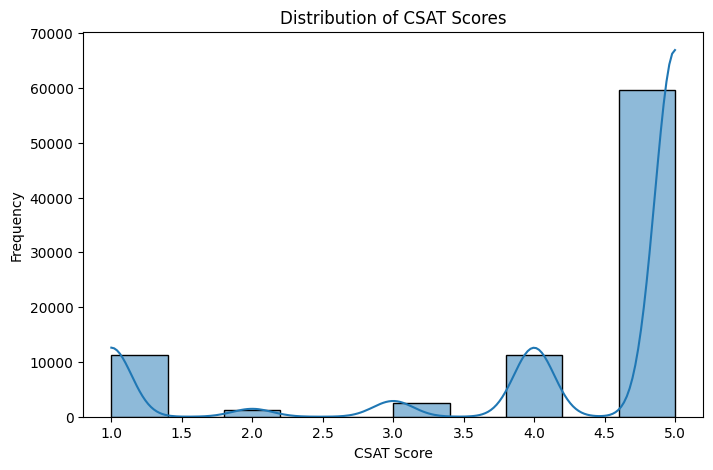

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['CSAT Score'], bins=10, kde=True)
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
categorical_cols = ['Type', 'Department', 'Customer Category', 'Customer Lifetime Stage']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=col, y='CSAT Score', data=df)
        plt.xticks(rotation=45)
        plt.title(f'CSAT Score by {col}')
        plt.tight_layout()
        plt.show()


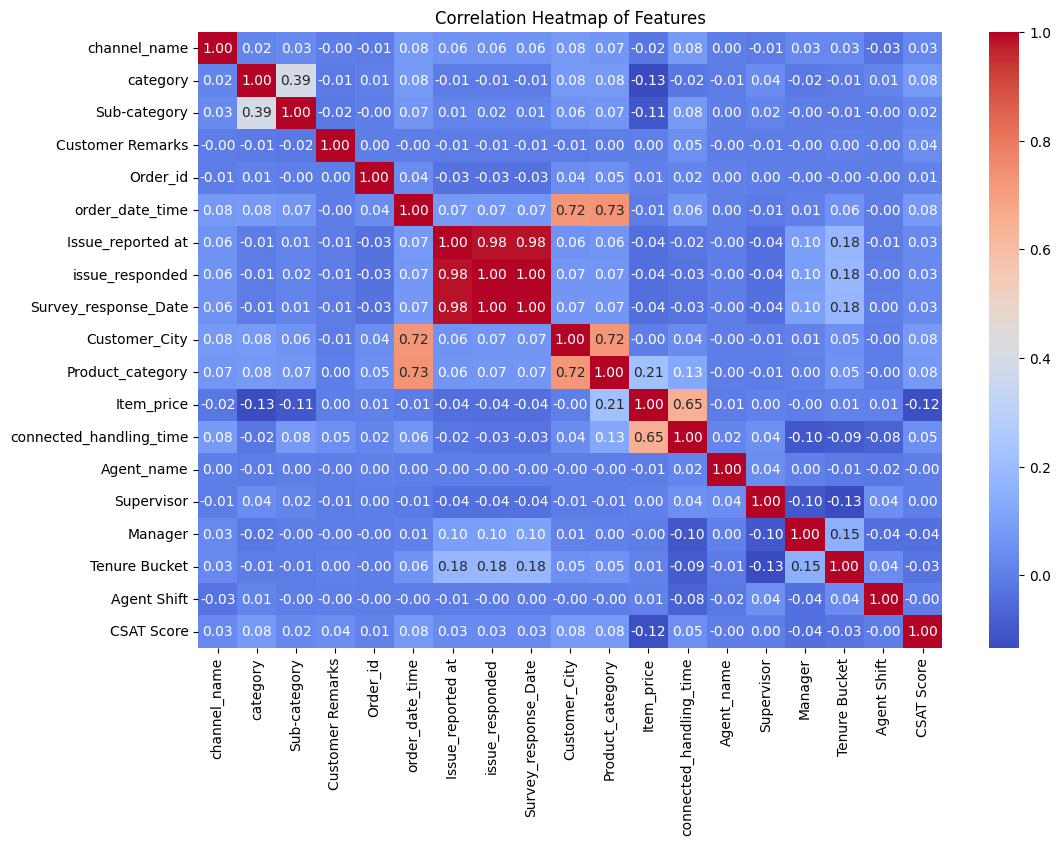

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
if 'Customer Wait Time (in seconds)' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Customer Wait Time (in seconds)', y='CSAT Score', data=df)
    plt.title("Wait Time vs CSAT Score")
    plt.xlabel("Customer Wait Time (seconds)")
    plt.ylabel("CSAT Score")
    plt.show()


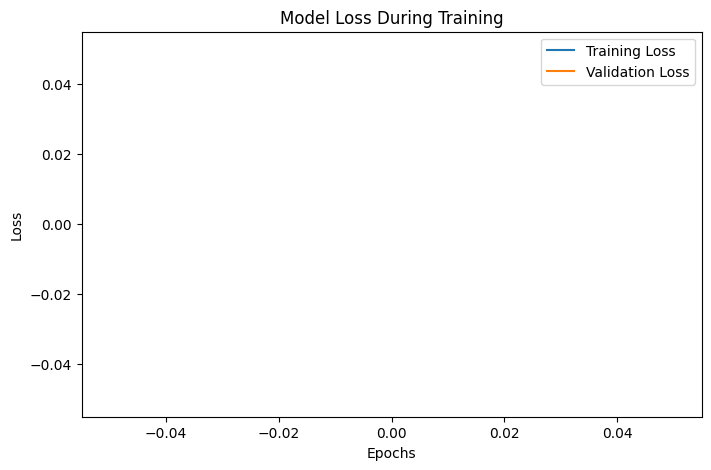

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


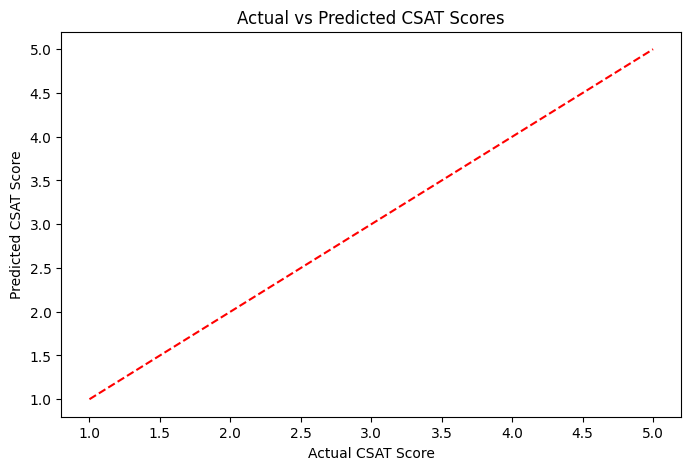

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual CSAT Score")
plt.ylabel("Predicted CSAT Score")
plt.title("Actual vs Predicted CSAT Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


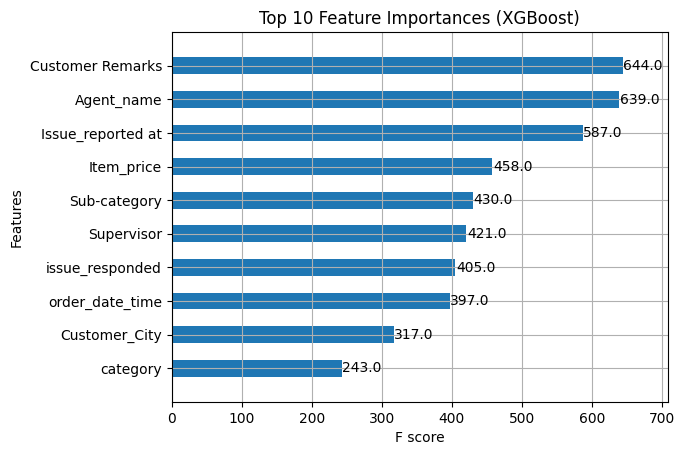

In [ ]:
# Train XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature Importance Plot
xgb.plot_importance(xgb_model, height=0.5, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


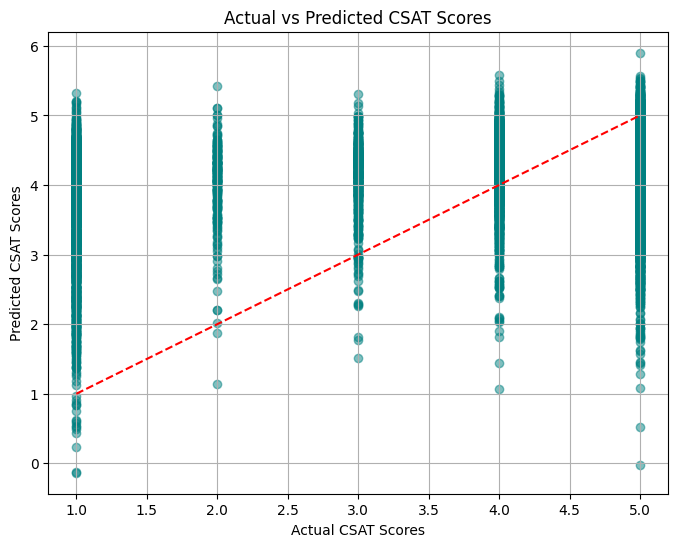

In [ ]:
y_pred = xgb_model.predict(X_test)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual CSAT Scores")
plt.ylabel("Predicted CSAT Scores")
plt.title("Actual vs Predicted CSAT Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()


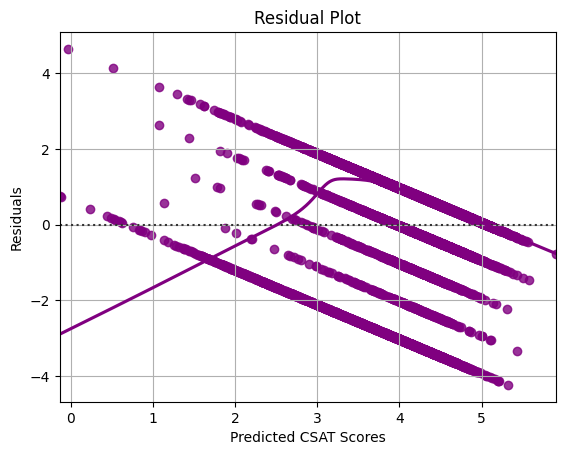

In [ ]:
residuals = y_test - y_pred

# Residual Plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color='purple')
plt.xlabel("Predicted CSAT Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


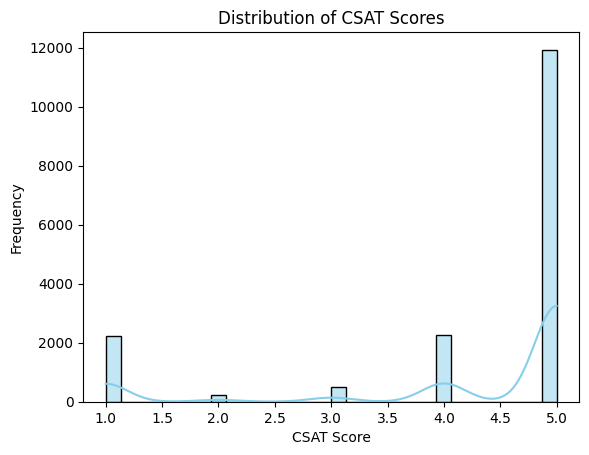

In [ ]:
# CSAT Score Distribution
sns.histplot(y_test, bins=30, kde=True, color='skyblue')
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()
